In [1]:
import pandas as pd

df = pd.read_csv("spam.csv", encoding='ISO-8859-1') #As it was unable to read directly.

In [2]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1855,ham,K.:)you are the only girl waiting in reception...,NaN,NaN,NaN
2795,ham,Tell your friends what you plan to do on Valen...,NaN,NaN,NaN
2175,ham,I'm at work. Please call,NaN,NaN,NaN
3239,ham,A cute thought for friendship: \Its not necess...,"but watever u shared should be true\""....""",NaN,NaN
3487,ham,Still i have not checked it da. . .,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
# Data Cleaning
# EDA
# Text Pre processing
# Model Building
# Evaluation
# Improvements
# Website
# Deploy

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Drop last 3 columns:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.sample(5)

,v1,v2
3716,ham,I'm gonna rip out my uterus.
1762,ham,Sometimes Heart Remembrs someone Very much... ...
2543,ham,Package all your programs well
1147,ham,Ok... Help me ask if she's working tmr a not?
4020,ham,We have to pick rayan macleran there.


In [9]:
# Renaming the columns:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)


In [10]:
df.sample(5)

,target,text
3442,ham,Your board is working fine. The issue of overh...
4507,ham,Not able to do anything.
5119,ham,Lol for real. She told my dad I have cancer
1172,ham,Happy new years melody!
813,ham,I borrow ur bag ok.


In [11]:
#Changing Values in target into numerals:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#Check for duplicates
df.duplicated().sum()

403

In [16]:
#Remove Duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2. EDA(Exploratory Data Analysis)

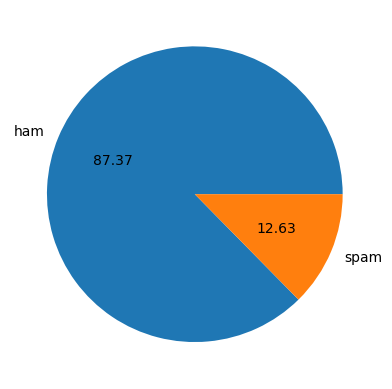

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
!pip install nltk
import nltk

In [21]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
#Fetch num of words:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))


In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [26]:
import re

df['num_sentences'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]+', x)))


In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [28]:
df[['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.846779
std,58.236293,11.068488,1.745441
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,39.000000


In [29]:
#Spam
df[df['target'] ==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.912711
std,30.137753,5.967672,1.806610
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [30]:
#Ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.692648
std,56.358207,11.116240,1.681598
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,39.000000


In [31]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

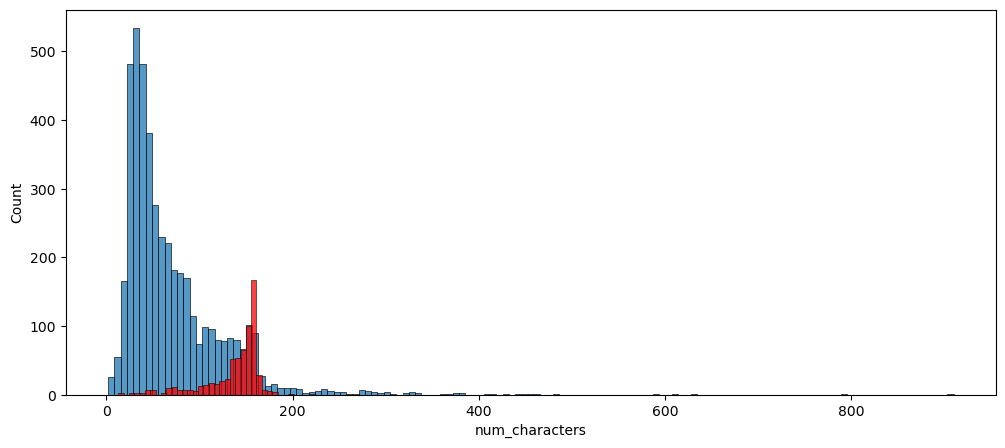

In [32]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

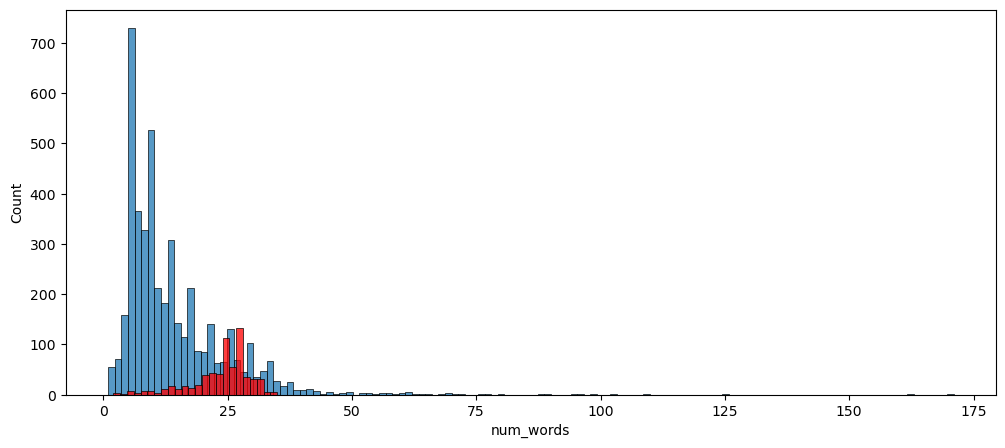

In [33]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

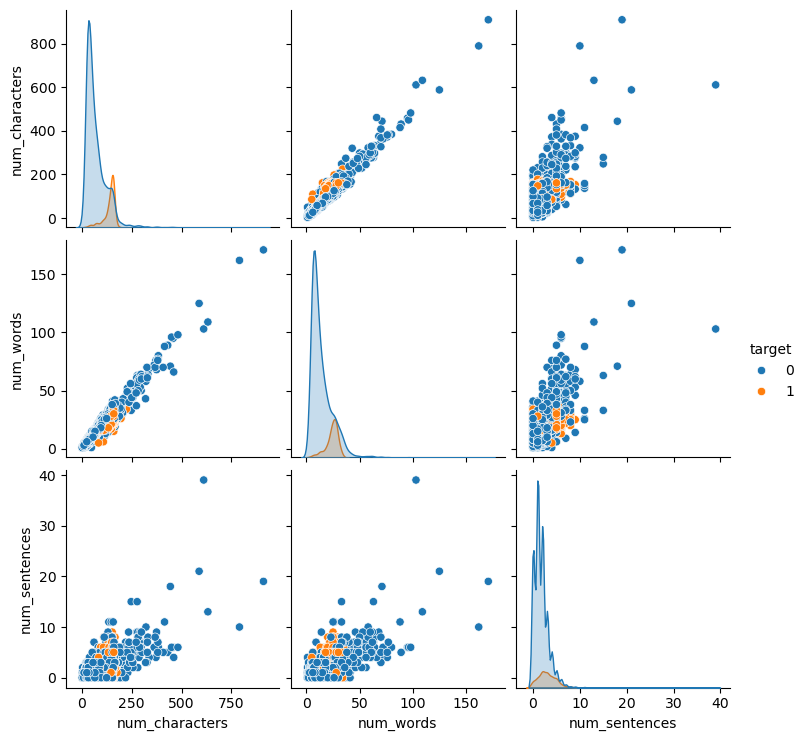

In [34]:
sns.pairplot(df, hue='target')

<Axes: >

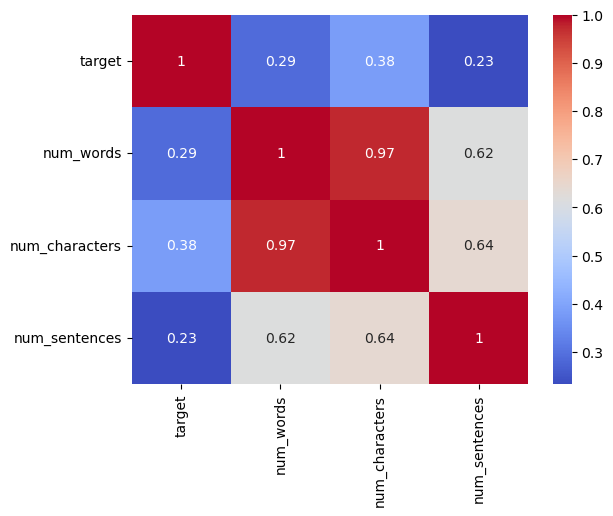

In [35]:
sns.heatmap(df[['target','num_words', 'num_characters','num_sentences']].corr(),annot=True, cmap="coolwarm")

## 3. Data Pre-Processing
#### >Lower Case
#### >Tokenization
#### >Removing Special characters
#### >Removing Stop Words and punctuation
#### >Stemming

In [36]:
#Some important Steps before transformation:

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
def transform_text(text):
    #for making text in lowercase:
    text = text.lower()
    #tokenaztion
    text = nltk.word_tokenize(text)
    y = []
    #Removing special Characters
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    #Removing Stop words and Punctuation

    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    #Stemming:
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
    
    return y

In [38]:
transform_text('I loved watching Game of Thrones **&&')

'love watch game throne'

In [39]:
df['transformed_text']= df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah think goe usf live around though


In [41]:
!pip install wordcloud
from wordcloud import WordCloud
wc= WordCloud()

In [42]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=''))

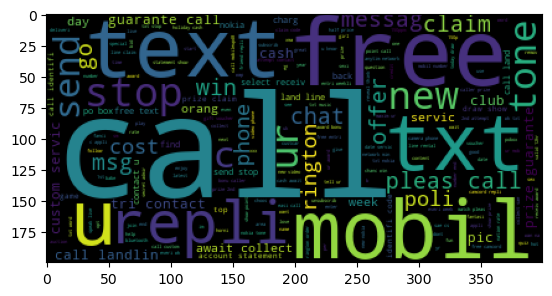

In [43]:
plt.imshow(spam_wc)

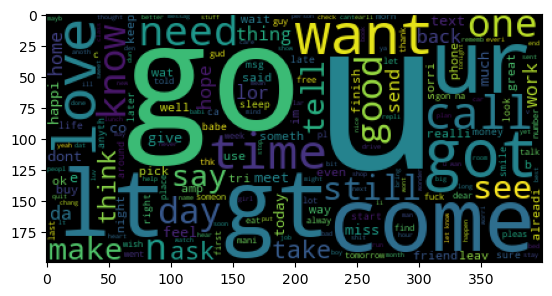

In [44]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))
plt.imshow(ham_wc)

## 4. Model Building

In [45]:
#Converting the 'transformed_text' into numerical format:-
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [46]:
Y = df['target'].values


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2)


In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [50]:
gnb = GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [51]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test, y_pred1))


0.8858800773694391
[[807 101]
 [ 17 109]]
0.5190476190476191


In [52]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test, y_pred2))

0.971953578336557
[[907   1]
 [ 28  98]]
0.98989898989899


In [53]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test, y_pred3))

0.9806576402321083
[[907   1]
 [ 19 107]]
0.9907407407407407


In [55]:
import streamlit as st
import pickle

tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

st.title("Email/SMS Spam Classifier")

input_sms=st.text_input("Enter the message")

if st.button("Predict"):
    #1. Preprocess
    transformed_sms = transform_text(input_sms)

    #2. Vectorize
    vector_input = tfidf.transform([transformed_sms])
    #3.Predict
    result = model.predict(vector_input)[0]
    #4.Display
    if result == 1:
        st.header("Spam Alert!")
    else:
        st.header("Not Spam !")

2025-06-23 21:30:56.207 
  command:

    streamlit run C:\Users\subha\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-23 21:30:56.209 Session state does not function when running a script without `streamlit run`
